In [2]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [142]:
%%R
library(readr)
library(dplyr)

trump_df <- read_csv("./data/realdonaldtrump.csv")
colnames(trump_df)

[1] "favorite_count"          "source"                 
[3] "text"                    "in_reply_to_screen_name"
[5] "is_retweet"              "created_at"             
[7] "retweet_count"           "id_str"                 


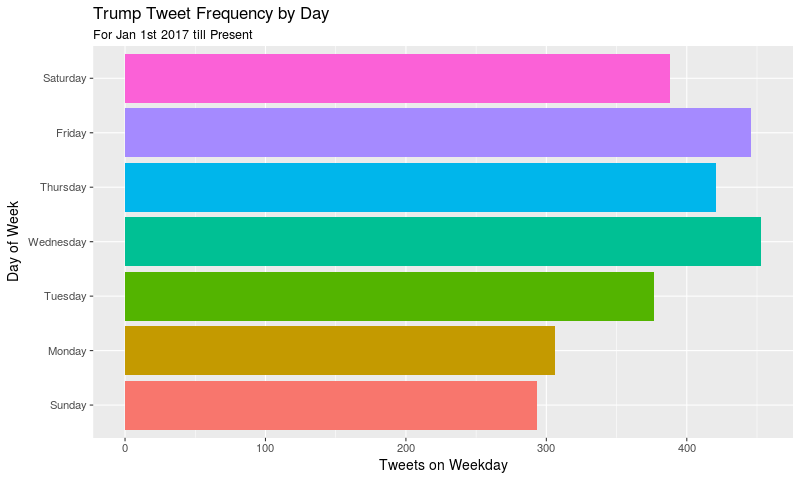

In [216]:
%%R -w 800
theme_set(theme_gray(base_size = 14))
trump_df$created_at <- gsub(" +0000", "", trump_df$created_at, fixed=T)
created_at <- as.POSIXlt(trump_df$created_at, "EST",  format="%a %b %d %H:%M:%S %Y")

created_at_day <- as.integer(created_at$wday)
tweet_day <- data.frame(t(table(created_at_day))) %>%
    select(created_at_day, Freq) %>%
    mutate(day=factor(created_at_day, levels=0:6, labels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))

library(ggplot2)

ggplot(tweet_day, aes(x=day, y=Freq, fill=day)) + geom_bar(stat="identity") + theme(legend.position="") +
    coord_flip() + labs(title="Trump Tweet Frequency by Day", subtitle="For Jan 1st 2017 till Present", x="Day of Week", y="Tweets on Weekday")

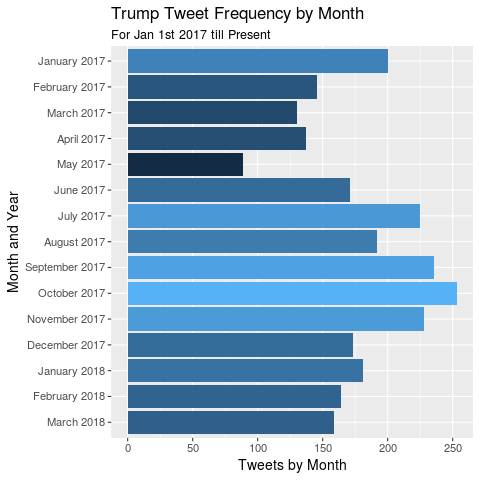

In [276]:
%%R

created_at_mon <- created_at$mon
created_at_year <- created_at$year

trump_df$month <- factor(created_at_mon, levels=0:11, labels = c("January","February","March","April","May","June","July","August","September","October","November","December"))
trump_df$year <- factor(created_at_year, levels=117:118, labels=c("2017","2018"))

tweet_month_year <- trump_df %>%
    group_by(month, year) %>%
    summarize(count=n()) %>%
    mutate(monthyear = factor(paste(month, year), levels=c("January 2017","February 2017","March 2017","April 2017","May 2017","June 2017",
                                                         "July 2017","August 2017", "September 2017","October 2017", "November 2017", "December 2017",
                                                         "January 2018", "February 2018", "March 2018"))) %>%
    mutate(monthyear = factor(monthyear, levels = rev(levels(monthyear)))) %>%
    select(monthyear, count)
    
tweet_month_year[order(as.Date(tweet_month_year$monthyear, format="%Y %B")),]


ggplot(tweet_month_year, aes(x=monthyear, y=count, fill=count)) + geom_bar(stat="identity") + theme(legend.position="") +
    coord_flip() + labs(title="Trump Tweet Frequency by Month", subtitle="For Jan 1st 2017 till Present", x="Month and Year", y="Tweets by Month") 

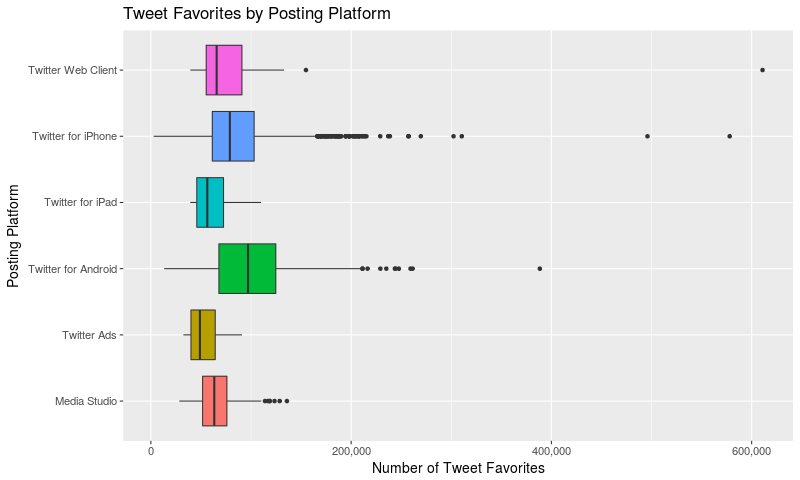

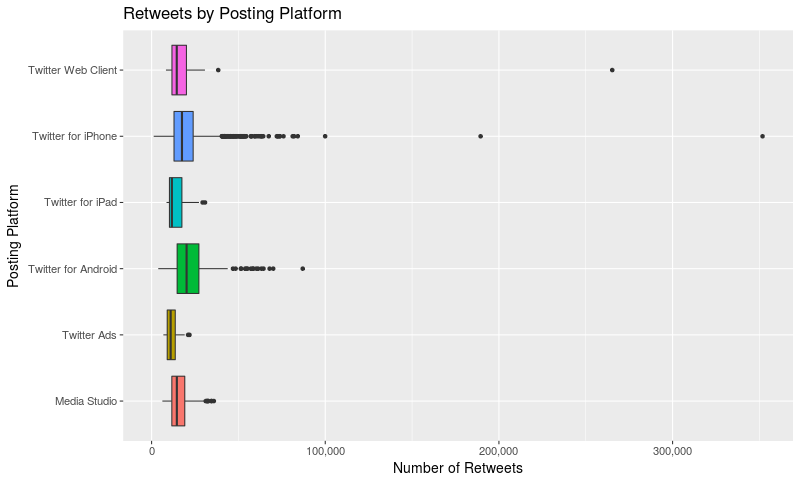

In [208]:
%%R -w 800

print(ggplot(trump_df, aes(y=favorite_count, x=source, fill=source)) + geom_boxplot() + coord_flip() +
    theme(legend.position="") + 
    labs(x="Posting Platform", y="Number of Tweet Favorites", title="Tweet Favorites by Posting Platform") +
    scale_y_continuous(labels=scales::comma))

print(ggplot(trump_df, aes(y=retweet_count, x=source, fill=source)) + geom_boxplot() + coord_flip() +
    theme(legend.position="") + 
    labs(x="Posting Platform", y="Number of Retweets", title="Retweets by Posting Platform") +
    scale_y_continuous(labels=scales::comma))

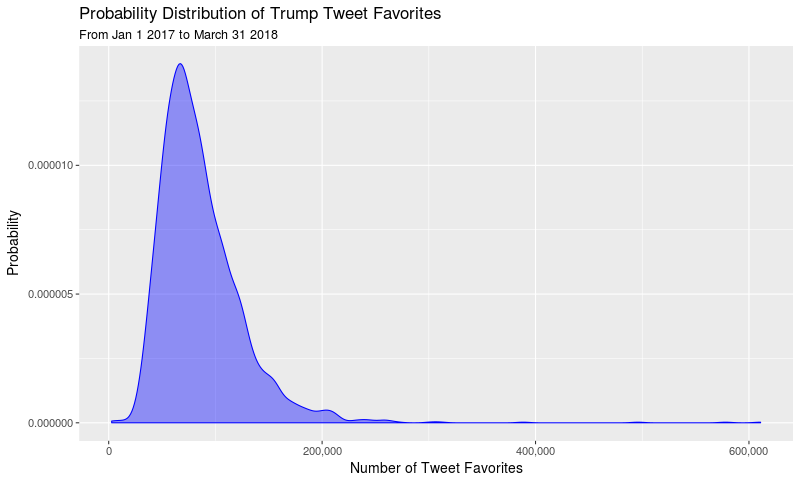

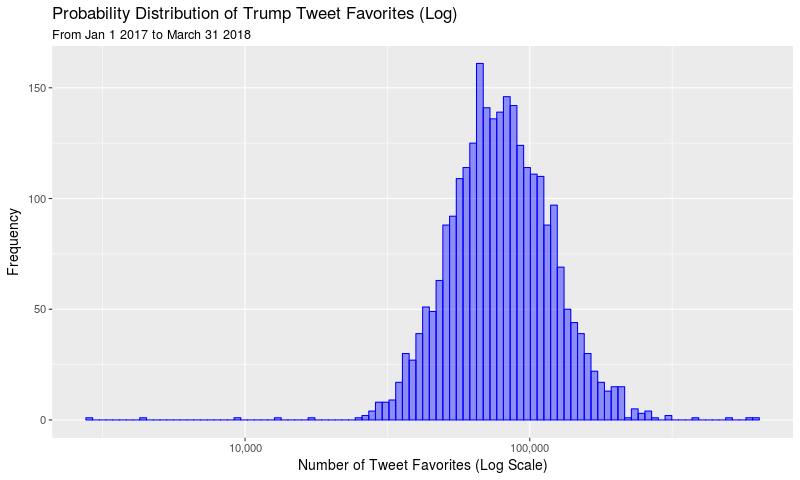

In [211]:
%%R -w 800

smoothed_fav_freq <- trump_df %>%
    mutate(favorite_count = round(favorite_count/1000, digits=0)*1000) %>%
    group_by(favorite_count) %>%
    summarize(count=n())
    
print(ggplot(trump_df, aes(x=favorite_count, fill=I('blue'), color=I('blue'))) + geom_density(alpha=0.4) +
    scale_x_continuous(labels = scales::comma) + scale_y_continuous(labels = scales::comma) +
    labs(title="Probability Distribution of Trump Tweet Favorites", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Tweet Favorites", y="Probability"))
    
# We can see from this second plot that his likes seem to follow a 'log-normal' distribution
ggplot(trump_df, aes(x=favorite_count, color=I('blue'), fill=I('blue'))) + geom_histogram(bins=100, alpha=0.4)  + scale_x_log10(labels= scales::comma) +
     labs(title="Probability Distribution of Trump Tweet Favorites (Log)", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Tweet Favorites (Log Scale)", y="Frequency")

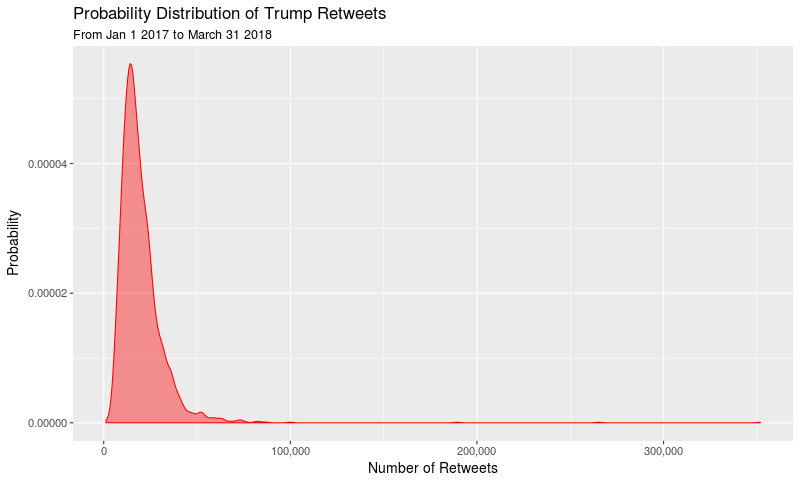

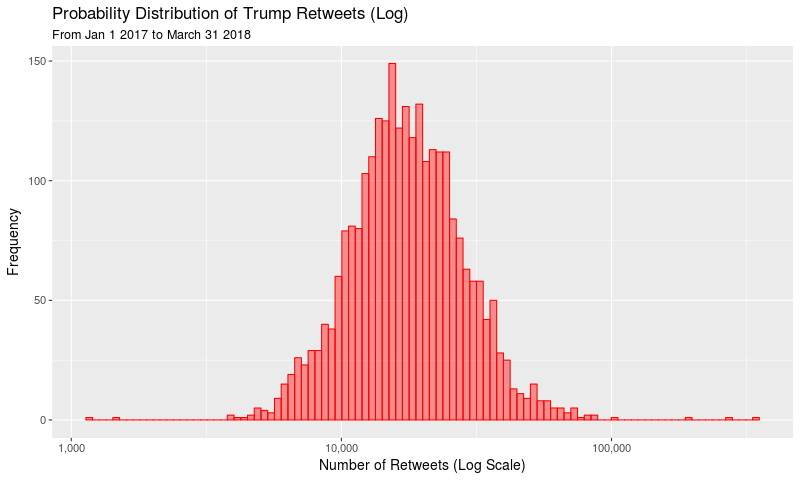

In [212]:
%%R -w 800

print(ggplot(trump_df, aes(x=retweet_count, fill=I('red'), color=I('red'))) + geom_density(alpha=0.4) +
    scale_x_continuous(labels = scales::comma) + scale_y_continuous(labels = scales::comma) +
    labs(title="Probability Distribution of Trump Retweets", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Retweets", y="Probability"))
    
# We can see from this second plot that his likes seem to follow a 'log-normal' distribution
ggplot(trump_df, aes(x=retweet_count, color=I('red'), fill=I('red'))) + geom_histogram(bins=100, alpha=0.4)  + scale_x_log10(labels= scales::comma) +
     labs(title="Probability Distribution of Trump Retweets (Log)", subtitle="From Jan 1 2017 to March 31 2018",
         x = "Number of Retweets (Log Scale)", y="Frequency")

In [284]:
%%R

trump_df <- trump_df %>%
    arrange(desc(favorite_count))
    
print(trump_df$favorite_count[1:10])

trump_df$text[1:30]

 [1] 610902 578039 495946 388457 310478 302283 269594 261395 259269 257518
 [1] "Why would Kim Jong-un insult me by calling me \"old,\" when I would NEVER call him \"short and fat?\" Oh well, I try so… https://t.co/PmsWNkH4r4"
 [2] "#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg"                                                                                                      
 [3] "North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0"    
 [4] "Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views."       
 [5] "My warmest condolences and sympathies to the victims and families of the terrible Las Vegas shooting. God bless you!"                            
 [6] "The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they… https://t.co/TuiaWGtnbR"    
 [7] "Now tha

Thought: Maybe plot all those graphs on the same axis

Also: Average tweet favorites by weekday, month year